# Plot Selected Channels from Test/Train Data

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import os

from config import Config
import numpy as np
import rasterio


config = Config()

                                                path                 label
0                   Residential/Residential_1589.tif           Residential
1                      Industrial/Industrial_143.tif            Industrial
2                              Pasture/Pasture_6.tif               Pasture
3                     AnnualCrop/AnnualCrop_2355.tif            AnnualCrop
4  HerbaceousVegetation/HerbaceousVegetation_2997...  HerbaceousVegetation


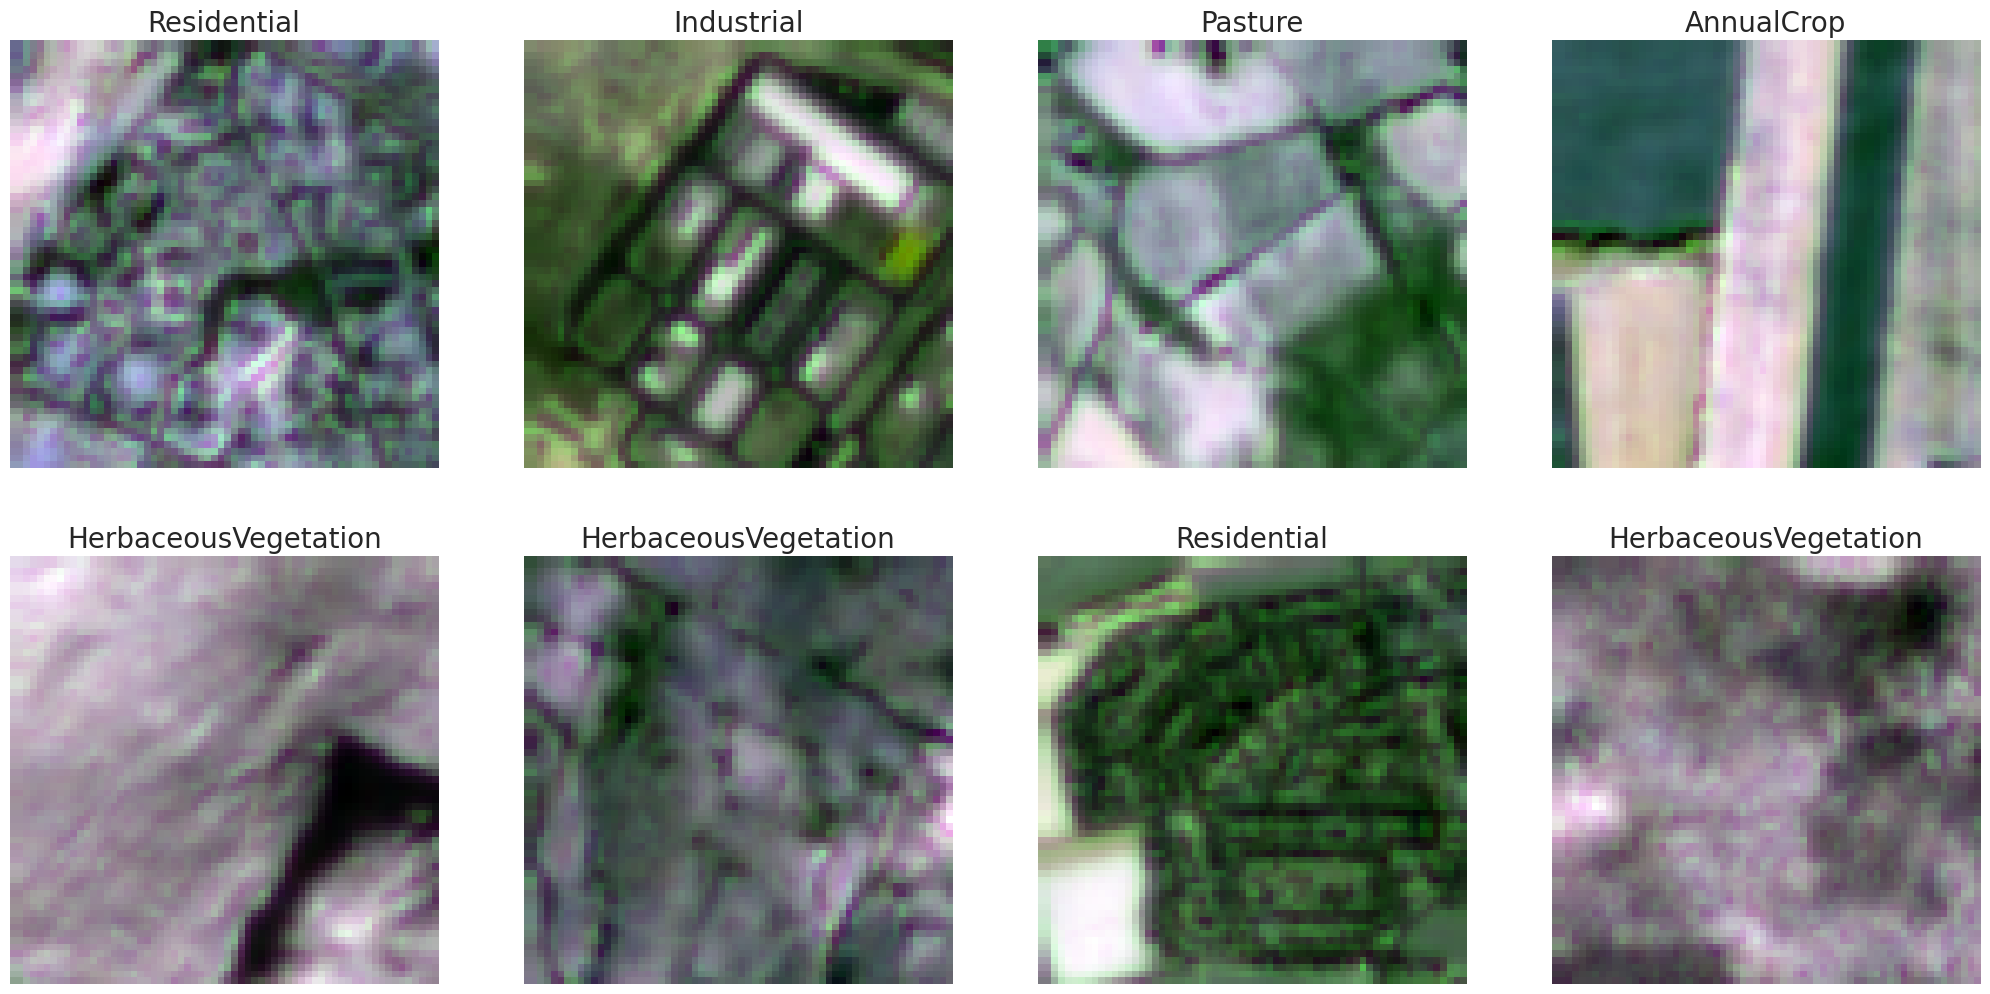

In [33]:
CHAN = [6, 7, 5]
n = 1

test_imgs = pd.read_csv(config.TRAIN_FILE)
test_imgs = test_imgs.sample(frac=1).reset_index(drop=True)
print(test_imgs.head())
for batch_start in range(0, n*8, 8):  # Iterate in steps of 8
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Create a new figure for each batch
    axs = axs.flatten()  # Flatten the grid for easy iteration

    for data, ax in zip(test_imgs.values[batch_start:batch_start+8], axs):
        path, label = data
        im_path = config.TRAIN_MS_DIR + path
        with rasterio.open(im_path) as src:
            img = np.array(src.read())
        img = img[CHAN].astype(np.float32)
        
        # Normalize the image channels wise
        for channel in range(len(CHAN)):
            rgb_min, rgb_max = img[channel].min(), img[channel].max()
            img[channel] = (img[channel] - rgb_min) / (rgb_max - rgb_min)
        
        ax.imshow(img.transpose(1, 2, 0))
        ax.set_title(label, fontsize=20)
        ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

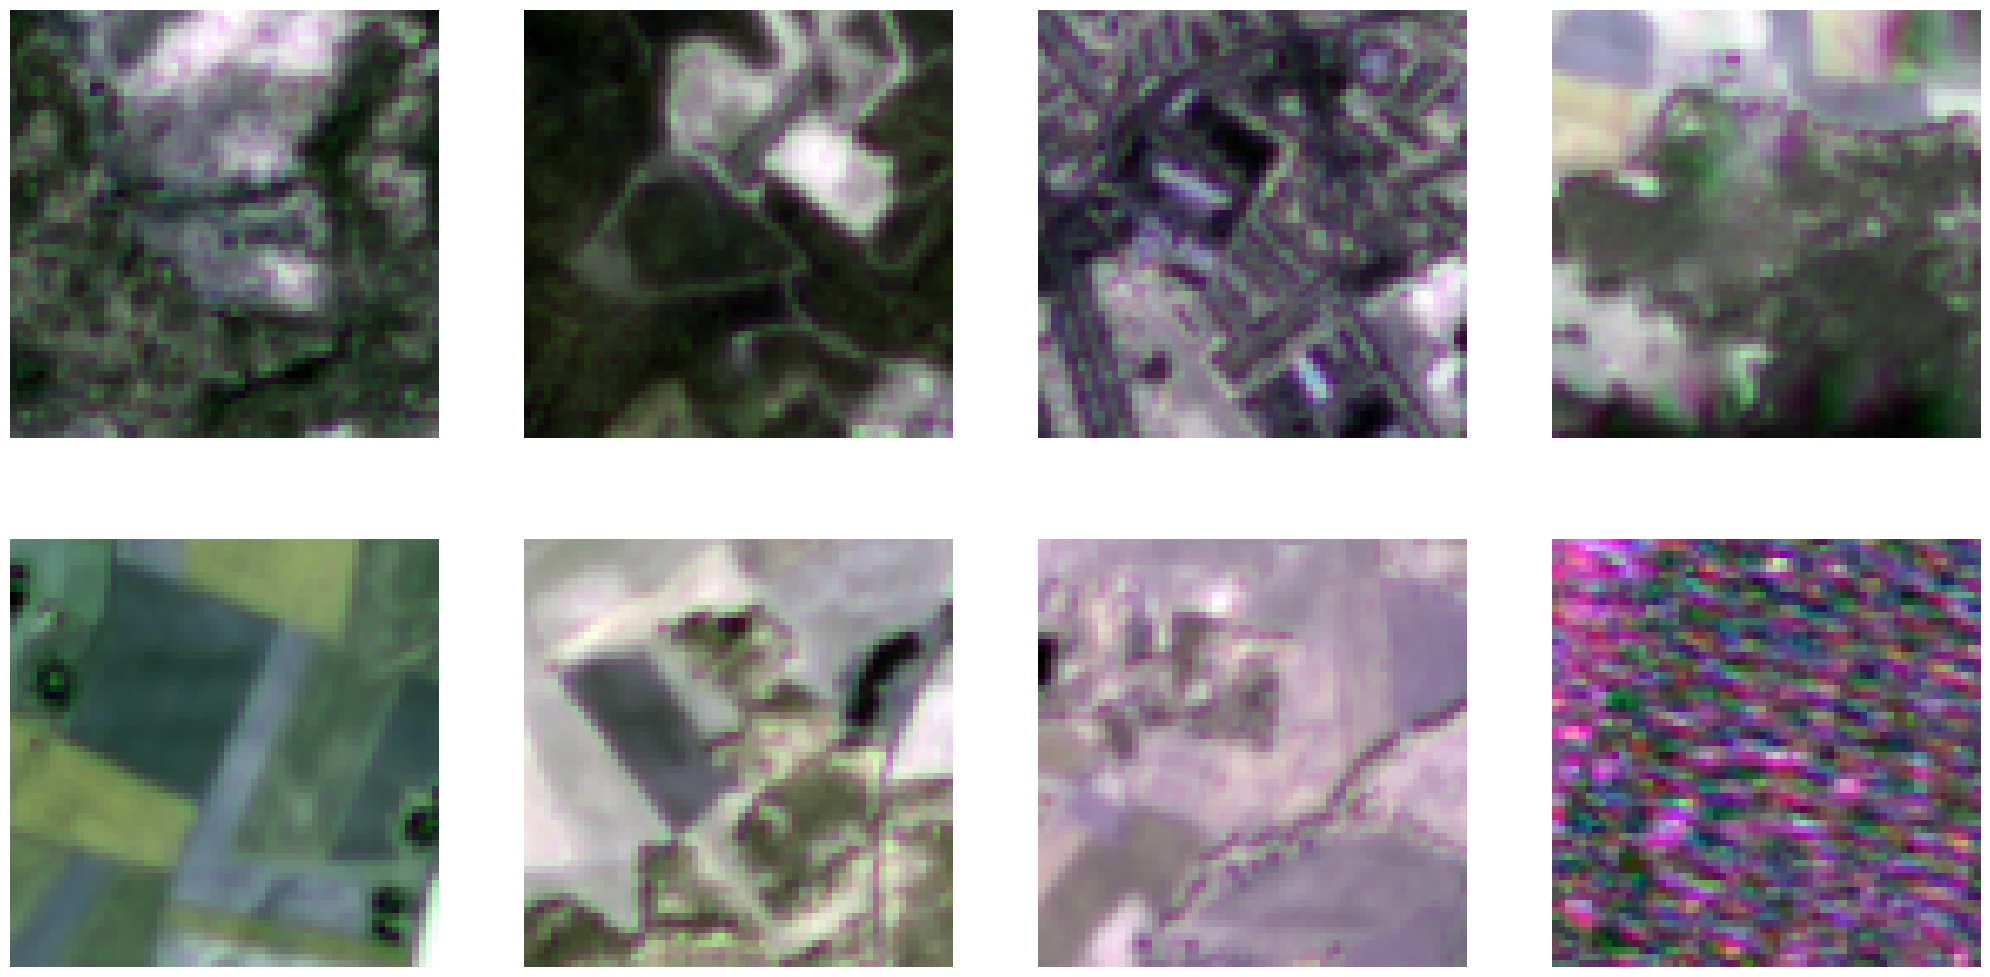

In [34]:
import random

CHAN = [6, 7, 5]
n = 1

test_imgs = os.listdir(config.TEST_MS_DIR)
random.shuffle(test_imgs)

for batch_start in range(0, n*8, 8):  # Iterate in steps of 8
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Create a new figure for each batch
    axs = axs.flatten()  # Flatten the grid for easy iteration

    for path, ax in zip(test_imgs[batch_start:batch_start+8], axs):
        img_path = config.TEST_MS_DIR + path
        img = np.load(img_path).transpose(2, 0, 1)
        img = img[CHAN].astype(np.float32)
        
        for channel in range(len(CHAN)):
            rgb_min, rgb_max = img[channel].min(), img[channel].max()
            img[channel] = (img[channel] - rgb_min) / (rgb_max - rgb_min)
        ax.imshow(img.transpose(1, 2, 0))
        ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()